# Рекуррентные нейронных сетей

In [2]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [3]:
df = pd.read_csv("C:/Users/Zhastay/Downloads/jena_climate_2009_2016/data330k580k.csv")

In [4]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [5]:
def create_time_steps(length):
  return list(range(-length, 0))
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

In [6]:
TRAIN_SPLIT = 20000
tf.random.set_seed(13)

In [50]:
uni_data = df['value']
uni_data.index = df['id']
uni_data = uni_data.values

In [ ]:
uni_data = tf.keras.utils.normalize(uni_data)[0]

In [51]:
Validation = []

for i in range(0, 100):
    univariate_past_history = 20 + i * 10
    univariate_future_target = 6

    x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
    x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                           univariate_past_history,
                                           univariate_future_target)

    BATCH_SIZE = 256
    BUFFER_SIZE = 10000

    train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
    train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

    val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
    val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

    simple_lstm_model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
        tf.keras.layers.Dense(1)
    ])

    simple_lstm_model.compile(optimizer='adam', loss='mae')

    EVALUATION_INTERVAL = 200
    EPOCHS = 1

    single_step_history = simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                          steps_per_epoch=EVALUATION_INTERVAL,
                          validation_data=val_univariate, validation_steps=50)
    print(univariate_past_history)

    Validation.append(single_step_history.history['val_loss'][0])
    
Validation

Train for 200 steps, validate for 50 steps
200/200 [==============================] - 3s 14ms/step - loss: 0.0078 - val_loss: 0.0083
20
Train for 200 steps, validate for 50 steps
200/200 [==============================] - 4s 19ms/step - loss: 0.0079 - val_loss: 0.0085
30
Train for 200 steps, validate for 50 steps
200/200 [==============================] - 4s 21ms/step - loss: 0.0078 - val_loss: 0.0085
40
Train for 200 steps, validate for 50 steps
200/200 [==============================] - 5s 25ms/step - loss: 0.0079 - val_loss: 0.0083
50
Train for 200 steps, validate for 50 steps
200/200 [==============================] - 6s 28ms/step - loss: 0.0079 - val_loss: 0.0084
60
Train for 200 steps, validate for 50 steps
200/200 [==============================] - 6s 31ms/step - loss: 0.0079 - val_loss: 0.0084
70
Train for 200 steps, validate for 50 steps
200/200 [==============================] - 7s 34ms/step - loss: 0.0079 - val_loss: 0.0086
80
Train for 200 steps, validate for 50 steps
200/2

600
Train for 200 steps, validate for 50 steps
200/200 [==============================] - 65s 325ms/step - loss: 0.0079 - val_loss: 0.0084
610
Train for 200 steps, validate for 50 steps
200/200 [==============================] - 66s 331ms/step - loss: 0.0080 - val_loss: 0.0082
620
Train for 200 steps, validate for 50 steps
200/200 [==============================] - 70s 350ms/step - loss: 0.0079 - val_loss: 0.0082
630
Train for 200 steps, validate for 50 steps
200/200 [==============================] - 74s 369ms/step - loss: 0.0079 - val_loss: 0.0078
640
Train for 200 steps, validate for 50 steps
200/200 [==============================] - 72s 358ms/step - loss: 0.0079 - val_loss: 0.0080
650
Train for 200 steps, validate for 50 steps
200/200 [==============================] - 79s 397ms/step - loss: 0.0079 - val_loss: 0.0081
660
Train for 200 steps, validate for 50 steps
200/200 [==============================] - 80s 399ms/step - loss: 0.0079 - val_loss: 0.0081
670
Train for 200 steps, va

[0.008336050501093269,
 0.00854772380553186,
 0.00851064793765545,
 0.008305677538737654,
 0.008431018497794866,
 0.008441745610907674,
 0.008584776474162937,
 0.008437737300992012,
 0.00839053931646049,
 0.00829729619435966,
 0.008222914347425104,
 0.008185100452974438,
 0.008360925242304801,
 0.008163210935890675,
 0.008200298408046364,
 0.008334166575223208,
 0.008180057862773538,
 0.00818541094660759,
 0.008534830305725336,
 0.008266541939228773,
 0.008351623145863414,
 0.008336254516616464,
 0.008316115681082011,
 0.008370812302455306,
 0.00823499054647982,
 0.00821455467492342,
 0.008230970511212944,
 0.008328930623829365,
 0.008222190262749791,
 0.00825674282386899,
 0.008327521895989776,
 0.008339539943262935,
 0.008297160491347313,
 0.008672374160960316,
 0.00833659223280847,
 0.008426674064248801,
 0.008230871744453907,
 0.008143246211111545,
 0.00831611206755042,
 0.008124612076207995,
 0.008610324319452047,
 0.00812769846059382,
 0.00823928602039814,
 0.008209940129891038,


# LSTM-модель для прогнозирование

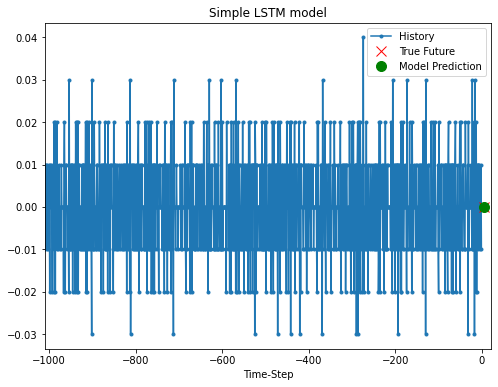

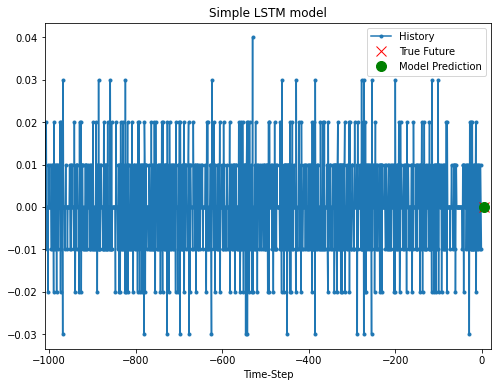

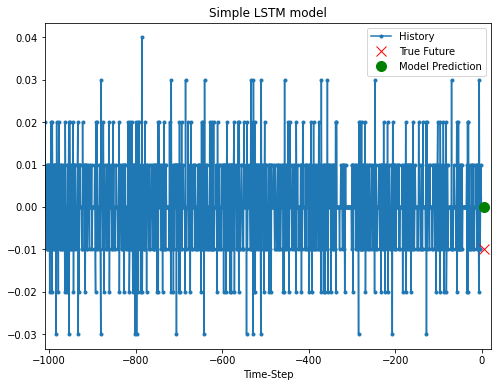

In [53]:
for x, y in val_univariate.take(3):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 6, 'Simple LSTM model')
  plot.show()

In [56]:
def plot_train_history(history, title):
  loss = history

  epochs = []
  for i in range(20, 1020, 10):
    epochs.append(i)

  plt.figure()

  plt.plot(epochs, loss, 'b', label='loss')
  plt.title(title)
  plt.legend()

  plt.show()

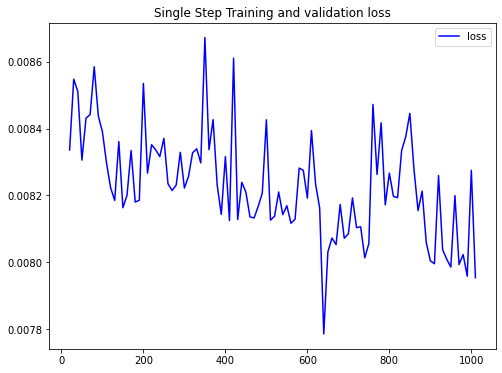

In [57]:
plot_train_history(Validation,
                   'Single Step Training and validation loss')